In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

##  Attribute Information:

Dataset: https://archive.ics.uci.edu/ml/datasets/Adult

Listing of attributes:

>50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [3]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
df = pd.read_csv("adult.data", names=columns)

In [4]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

We check for the unique data. Here we see the categorical value, which we are going to map to numerical like one hot encoding.

In [6]:
df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
def generateDict(data):
    dictonary_data = {v:k for k, v in enumerate(set(data))}
    return dictonary_data

In [8]:
generateDict(df["workclass"].unique())
    

{' Local-gov': 0,
 ' ?': 1,
 ' Federal-gov': 2,
 ' Without-pay': 3,
 ' Private': 4,
 ' Self-emp-not-inc': 5,
 ' Never-worked': 6,
 ' Self-emp-inc': 7,
 ' State-gov': 8}

In [9]:
# list of object types that we want to convert to dictionary
obj_list = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country","salary"]
# converted dictionary list
dobj_list = ["d_workclass","d_education","d_marital_status","d_occupation","d_relationship","d_race","d_sex","d_native_country","salary"]

for i,j in zip(dobj_list, obj_list):
    print("{} = generateDict(df['{}'].unique())".format(i,j))
    

d_workclass = generateDict(df['workclass'].unique())
d_education = generateDict(df['education'].unique())
d_marital_status = generateDict(df['marital-status'].unique())
d_occupation = generateDict(df['occupation'].unique())
d_relationship = generateDict(df['relationship'].unique())
d_race = generateDict(df['race'].unique())
d_sex = generateDict(df['sex'].unique())
d_native_country = generateDict(df['native-country'].unique())
salary = generateDict(df['salary'].unique())


In [10]:
# testing result of our generated function call
salary = generateDict(df['salary'].unique())
salary

{' >50K': 0, ' <=50K': 1}

In [11]:
# creating variables holding our dictionary
d_workclass = generateDict(df['workclass'].unique())
d_education = generateDict(df['education'].unique())
d_marital_status = generateDict(df['marital-status'].unique())
d_occupation = generateDict(df['occupation'].unique())
d_relationship = generateDict(df['relationship'].unique())
d_race = generateDict(df['race'].unique())
d_sex = generateDict(df['sex'].unique())
d_native_country = generateDict(df['native-country'].unique())
d_salary = generateDict(df['salary'].unique())

## Mapping our dataset

Here we map our numerical converted dataset to create a new dataframe holding it.

In [12]:
newdf = df

In [13]:
newdf.head()

age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

### After mapping - Everything is converted to numerical

In [14]:
newdf["workclass"]  = newdf["workclass"].map(d_workclass)
newdf["education"]  = newdf["education"].map(d_education)
newdf["marital-status"]  = newdf["marital-status"].map(d_marital_status)
newdf["occupation"]  = newdf["occupation"].map(d_occupation)
newdf["relationship"]  = newdf["relationship"].map(d_relationship)
newdf["race"]  = newdf["race"].map(d_race)
newdf["sex"]  = newdf["sex"].map(d_sex)
newdf["native-country"]  = newdf["native-country"].map(d_native_country)
newdf["salary"]  = newdf["salary"].map(d_salary) 

In [15]:
newdf.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   50          5   83311         11             13               3   
1   38          4  215646         12              9               2   
2   53          4  234721          8              7               3   
3   28          4  338409         11             13               3   
4   37          4  284582          0             14               3   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0          11             5     3    0             0             0   
1           7             3     3    0             0             0   
2           7             5     1    0             0             0   
3          12             2     1    1             0             0   
4          11             2     3    1             0             0   

   hours-per-week  native-country  salary  
0              13              32       1  
1              40              32       1  
2              40              32       1  
3              40              26       1  
4              40              32       1

In [16]:
newdf.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
salary            int64
dtype: object

In [18]:
# visualizing 
# !sudo apt-get install -y python3-seaborn
import matplotlib.pyplot as plt
import seaborn as sns


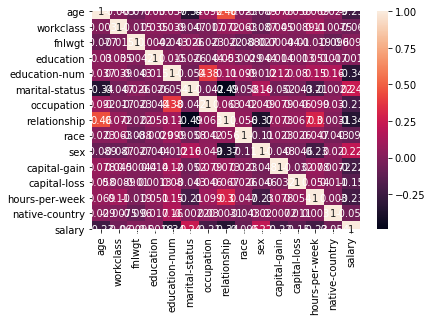

In [20]:
# correlation plot
corrmat = newdf.corr()
sns.heatmap(corrmat, annot=True)


<Figure size 1440x720 with 0 Axes>

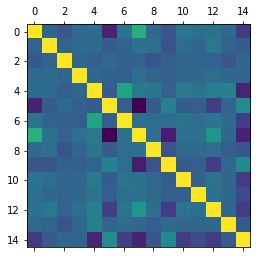

In [21]:
# matplotlib plotting the correlation matrix
plt.figure(figsize=(20,10))
plt.matshow(corrmat)
plt.show()

In [22]:
# checking the value count to see how balanced our data is
newdf["salary"].value_counts()

1    24719
0     7841
Name: salary, dtype: int64

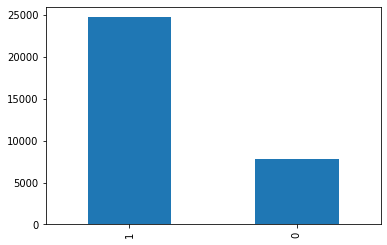

In [23]:
# plotting our distribution
newdf["salary"].value_counts().plot(kind="bar")

### Machine learning

In [24]:
newdf.shape

(32560, 15)

In [26]:
# last column salary is our target class 
X = newdf.iloc[:,0:14].values #include all column from 0-13
y = newdf.iloc[:,14].values

In [28]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [29]:
# splitting our data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30)

In [31]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(22792, 14) (9768, 14)
(22792,) (9768,)


## Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# accuracy score
logreg.score(x_test, y_test)

0.7995495495495496

### Saving model

In [37]:
import warnings
warnings.filterwarnings("ignore") #not to show warnings
from sklearn.externals import joblib

In [38]:
salary_logistic_prediction = open("salary_prediction_logistic_regression.pkl","wb")
joblib.dump(logreg,salary_logistic_prediction)
salary_logistic_prediction.close()

## Naive Bayes

In [40]:
naivebayes = MultinomialNB()
naivebayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
# accuracy score
naivebayes.score(x_test, y_test)

0.7848075348075348

In [42]:
# save our naive bayes model
naive_bayes_model = open("naive_bayes_model.pkl","wb")
joblib.dump(naivebayes,naive_bayes_model)
naive_bayes_model.close()

## RandomForestClassifier

In [44]:
randomForest = RandomForestClassifier(n_estimators=100, max_depth=5)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# accuracy score
randomForest.score(x_test, y_test)

0.8532964782964783

In [46]:
# save our randomForest model
randomForest_model = open("randomForest_model.pkl","wb")
joblib.dump(randomForest,randomForest_model)
randomForest_model.close()

## Cross validation

In [52]:
cv_score_lreg = cross_val_score(LogisticRegression(),X,y,cv=10)
cv_score_lreg

array([0.78777641, 0.79238329, 0.7791769 , 0.78194103, 0.79668305,
       0.78716216, 0.79269042, 0.79084767, 0.78101966, 0.80620393])

In [53]:
print(np.mean(cv_score_lreg))

0.789588452088452


In [54]:
cv_score_nv = cross_val_score(MultinomialNB(),X,y,cv=10)
cv_score_nv

array([0.78286241, 0.78194103, 0.77886978, 0.77948403, 0.78132678,
       0.79054054, 0.77395577, 0.78163391, 0.78409091, 0.79176904])

In [56]:
print(np.mean(cv_score_nv))

0.7826474201474201


In [57]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X,y,cv=10)
cv_score_rf

array([0.84060197, 0.85964373, 0.85227273, 0.85995086, 0.85565111,
       0.85534398, 0.85718673, 0.86148649, 0.86578624, 0.85411548])

In [58]:
print(np.mean(cv_score_rf))

0.8562039312039312


### Intrepreting Models
ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.
* Installation: pip install eli5 or python3 pip -m  install eli5
* More description: https://eli5.readthedocs.io/en/latest/overview.html

In [59]:
import eli5
import warnings
warnings.filterwarnings("ignore") #not to show warnings

In [60]:
eli5.show_weights(logreg, top=10)

In [66]:
# because we ignore last column salary
features = list(newdf.columns)
features = features[:14]
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [69]:
eli5.show_weights(logreg, feature_names = features, target_names="salary")

#### We can now clearly see which one of the features is contributing more and which one is less. 

Let's now test for our x_test[11] value for prediction.

In [70]:
x_test[11]

array([    28,      4, 133043,     12,      9,      2,      6,      4,
            3,      1,      0,      0,     50,     32])

In [72]:
# we reshape to make it single sample
x11 = np.array(x_test[11].reshape(1,-1))
logreg.predict(x11)

array([1])

** Predictions **
* 1: salary > 50k
* 0: salary <50k

It is predicting as 1 that means the salary is more than 50k. 

Lets now see wich one of the features are contribution more for this prediction.

In [75]:
eli5.show_prediction(logreg, x_test[11], feature_names = features, target_names="salary")

In [76]:
# explain weights
eli5.explain_weights(logreg)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x13', weight=0.009216442516192644, std=None, value=None), FeatureWeight(feature='x12', weight=0.0070604108342362595, std=None, value=None), FeatureWeight(feature='x0', weight=0.006332844565034304, std=None, value=None), FeatureWeight(feature='x3', weight=0.0024901014394249116, std=None, value=None), FeatureWeight(feature='x5', weight=0.0018002543435968034, std=None, value=None), FeatureWeight(feature='x4', weight=0.0015311423297701499, std=None, value=None), FeatureWeight(feature='x1', weight=0.0010711792971113943, std=None, value=None), FeatureWeight(feature='x8', weight=0.0007923039791262414, std=None, value=None), FeatureWeight(feature='x9', weight=0.0003331877281695143, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.00031957905318195424, std=None, value=None), FeatureWeight(feature='x6', weight=8.813677274790155e-05, std=None, value=None), FeatureWeight(feature='x2', weight=2.7053754101666803e-06, std=None, value=None)], neg=[FeatureWeight(feature='x11', weight=-0.0008071876363515734, std=None, value=None), FeatureWeight(feature='x10', weight=-0.0003531697530876004, std=None, value=None), FeatureWeight(feature='x7', weight=-0.00021006800335679306, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)